# Figure UK-KingsCollege site temperature
- This script is used to visualize varaibles at the UK-KingsCollege site on 2013-07-22;
- Simulations: CNTL, BASE;

In [40]:
import xarray as xr
import pandas as pd
import numpy as np
import cftime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [49]:
output_dir = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project2/sp/uk_map/'
df_grid = pd.read_csv(output_dir + 'result_grid.csv')
df_grid

,time,SWBGT_U_def,SWBGT_U_lcz,hour,minute,diurnal
0,2013-07-22 00:00:00,21.938726,22.332767,0,0,00:00
1,2013-07-22 00:30:00,21.872414,22.283950,0,30,00:30
2,2013-07-22 01:00:00,21.681364,22.098442,1,0,01:00
3,2013-07-22 01:30:00,21.625538,22.064867,1,30,01:30
4,2013-07-22 02:00:00,21.534475,21.982815,2,0,02:00
5,2013-07-22 02:30:00,21.466385,21.943382,2,30,02:30
6,2013-07-22 03:00:00,21.315685,21.767895,3,0,03:00
7,2013-07-22 03:30:00,21.013685,21.439442,3,30,03:30
8,2013-07-22 04:00:00,20.744205,21.157060,4,0,04:00
9,2013-07-22 04:30:00,20.536430,20.952028,4,30,04:30


In [50]:
max_index = df_grid['SWBGT_U_def'].idxmax()
max_row = df_grid.loc[max_index]
max_row

time           2013-07-22 14:30:00
SWBGT_U_def              28.645937
SWBGT_U_lcz              28.655012
hour                            14
minute                          30
diurnal                      14:30
Name: 29, dtype: object

In [51]:
df_lnd = pd.read_csv(output_dir + 'result_lnd.csv')
df_lnd['time'] = pd.to_datetime(df_lnd['time'])
df_lnd

,time,lndtype,SWBGT_U
0,2013-07-22 00:00:00,7,22.335325
1,2013-07-22 00:30:00,7,22.289618
2,2013-07-22 01:00:00,7,22.108931
3,2013-07-22 01:30:00,7,22.074051
4,2013-07-22 02:00:00,7,21.996906
...,...,...,...
475,2013-07-22 21:30:00,16,25.535133
476,2013-07-22 22:00:00,16,25.349079
477,2013-07-22 22:30:00,16,25.168249
478,2013-07-22 23:00:00,16,25.084925


In [52]:
#lc0 = '#083550'
#lc1 = '#006bac'
#lc2 = '#3da4e3'
#lc4 = '#a29cf7'
#lc10 = '#ff912b'
lc0 = '#006bac'
lc1 = '#8c0000'
lc2 = '#d10000'
lc4 = '#bf4d00'
lc10 = '#555555'
xwidth = 0.5
labelcolor = '#6b6b6b'
labelfont = 6
pad = 1
length = 2
linewidth = 0.5
lc = [lc0, lc1]
llc = [lc0, lc1, lc2, lc4, lc10]
title = ['(a) Grid-level', '(b) Landunit level']
padding = 4
label = ['CNTL', 'BASE']
handletextpad = 0.5
y_loc = [0.7, 0.4]
var_tag = 'SWBGT_U'
tag = ['_def', '_lcz']

/tmp/5310106.1.parallel.q/ipykernel_1782/4013428550.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['time']=df_var['time'].dt.round('min')
/tmp/5310106.1.parallel.q/ipykernel_1782/4013428550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['time']=df_var['time'].dt.ceil('min')
/tmp/5310106.1.parallel.q/ipykernel_1782/4013428550.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

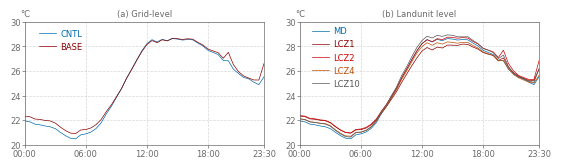

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 1.5))
ax = axs.flatten()

for i in range(2): 
    var_name = var_tag + tag[i]
    ax[0].plot(df_grid.diurnal, df_grid[var_name], linewidth = linewidth, color = lc[i], label = label[i])   

ax[1].plot(df_grid.diurnal, df_grid[var_tag+'_def'], linewidth = linewidth, color = lc[0], label = 'MD')   
   
for j, indexing in enumerate([1, 2, 4, 10]):
    lcz_index = indexing + 6
    df_var = df_lnd[df_lnd['lndtype']==lcz_index]
    df_var['time']=df_var['time'].dt.round('min')
    df_var['time']=df_var['time'].dt.ceil('min')
    df_var['hour']=(df_var.time.dt.hour) % 24
    df_var['minute']=df_var.time.dt.minute
    df_var['diurnal']=df_var['hour'].astype(str).str.zfill(2) + ':' + df_var['minute'].astype(str).str.zfill(2)
    ax[1].plot(df_var.diurnal, df_var[var_tag], 
               linewidth = linewidth, color = llc[j+1], label = 'LCZ'+str(indexing))
            
for i in range(2):            
    #ax[i].set_ylim(16, 45)  
    ax[i].set_ylim(20, 30) 
    ax[i].set_xlim(df_var.diurnal.iloc[0], df_var.diurnal.iloc[-1])
    ax[i].set_xticks([df_var.diurnal.iloc[0], '06:00', '12:00', '18:00',
                      df_var.diurnal.iloc[-1]])
    #ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].spines['top'].set_color(labelcolor)
    ax[i].spines['right'].set_color(labelcolor)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].spines['left'].set_color(labelcolor)
    ax[i].spines['top'].set_linewidth(xwidth)
    ax[i].spines['right'].set_linewidth(xwidth)
    ax[i].spines['bottom'].set_linewidth(xwidth)
    ax[i].spines['left'].set_linewidth(xwidth)
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].set_ylabel('°C', labelpad=5, rotation=0, ha='center', 
                     fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(0, 1.025)
    ax[i].set_title(title[i],fontsize=labelfont,color=labelcolor, pad = padding)
    lines, labels = ax[i].get_legend_handles_labels()
    legend = ax[i].legend(lines, labels, bbox_to_anchor=(0.15, y_loc[i]), loc='lower center', 
                          frameon=False, handletextpad=handletextpad, fontsize=labelfont, ncol=1)
    for i, text in enumerate(legend.get_texts()):
        text.set_color(llc[i])
plt.subplots_adjust(left=0.04, right=0.975, bottom=0.1, top=0.92, wspace=0.15, hspace= 0.35)    

fig.savefig(output_dir + 'temp_map.png', dpi=300)    
fig.savefig(output_dir + 'temp_map.pdf', dpi=600) 

# Description

In [30]:
for j, indexing in enumerate([1, 2, 4, 10]):
    lcz_index = indexing + 6
    df_var = df_lnd[df_lnd['lndtype']==lcz_index]
    df_var['time']=df_var['time'].dt.round('min')
    df_var['time']=df_var['time'].dt.ceil('min')
    df_var['hour']=(df_var.time.dt.hour) % 24
    df_var['minute']=df_var.time.dt.minute
    df_var['diurnal']=df_var['hour'].astype(str).str.zfill(2) + ':' + df_var['minute'].astype(str).str.zfill(2)
    print(df_var[var_tag].max())
    # diurnal_mean_landunit = df_var.groupby('diurnal').mean().reset_index()
    #print(diurnal_mean_landunit[diurnal_mean_landunit['diurnal']=='14:00']['TG_U'].values-273.15)

28.324268341064453
28.26536750793457
28.30264663696289
28.323469161987305


/tmp/5310106.1.parallel.q/ipykernel_1782/173555873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['time']=df_var['time'].dt.round('min')
/tmp/5310106.1.parallel.q/ipykernel_1782/173555873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['time']=df_var['time'].dt.ceil('min')
/tmp/5310106.1.parallel.q/ipykernel_1782/173555873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [69]:
(df_grid[var_tag + '_def']).max()

28.645937

In [58]:
df_var

,time,lndtype,TG_U,hour,minute,diurnal
0,2013-07-22 00:00:00,16,295.097229,0,0,00:00
1,2013-07-22 00:30:00,16,294.790955,0,30,00:30
2,2013-07-22 01:00:00,16,294.418701,1,0,01:00
3,2013-07-22 01:30:00,16,294.208618,1,30,01:30
4,2013-07-22 02:00:00,16,293.942780,2,0,02:00
5,2013-07-22 02:30:00,16,293.759949,2,30,02:30
6,2013-07-22 03:00:00,16,293.469604,3,0,03:00
7,2013-07-22 03:30:00,16,293.100464,3,30,03:30
8,2013-07-22 04:00:00,16,292.734741,4,0,04:00
9,2013-07-22 04:30:00,16,292.582336,4,30,04:30
